# 1、作用
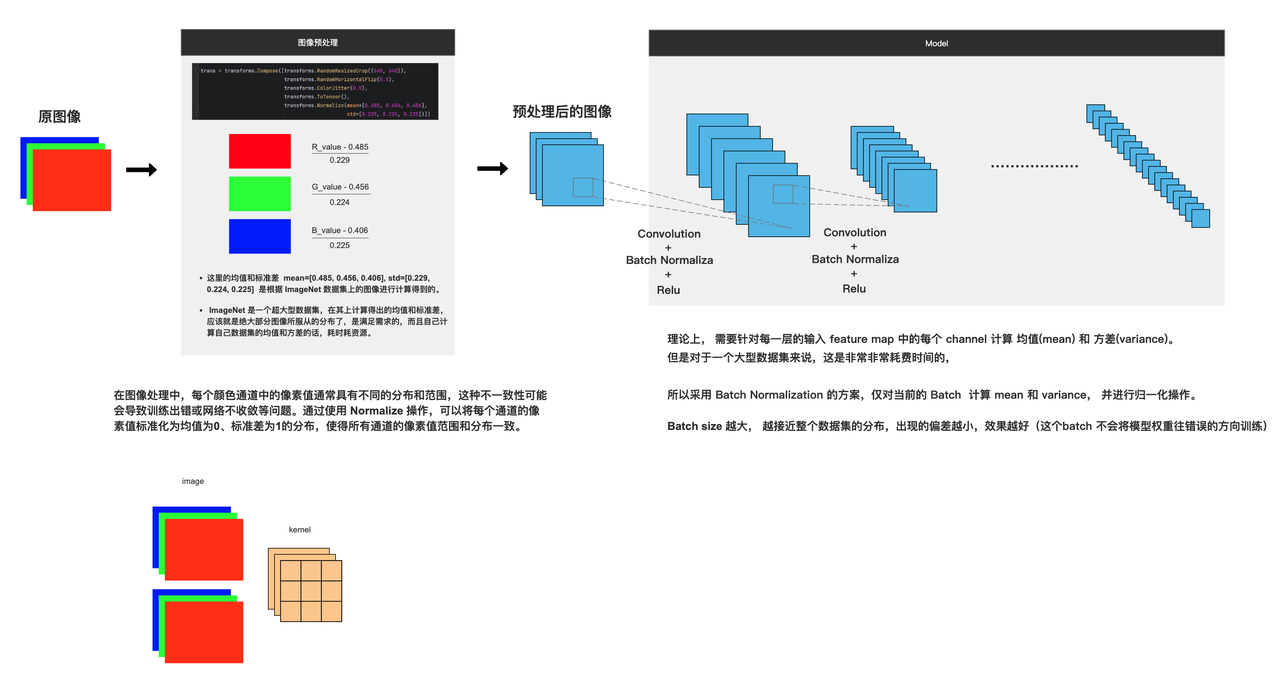

# 2、计算方式
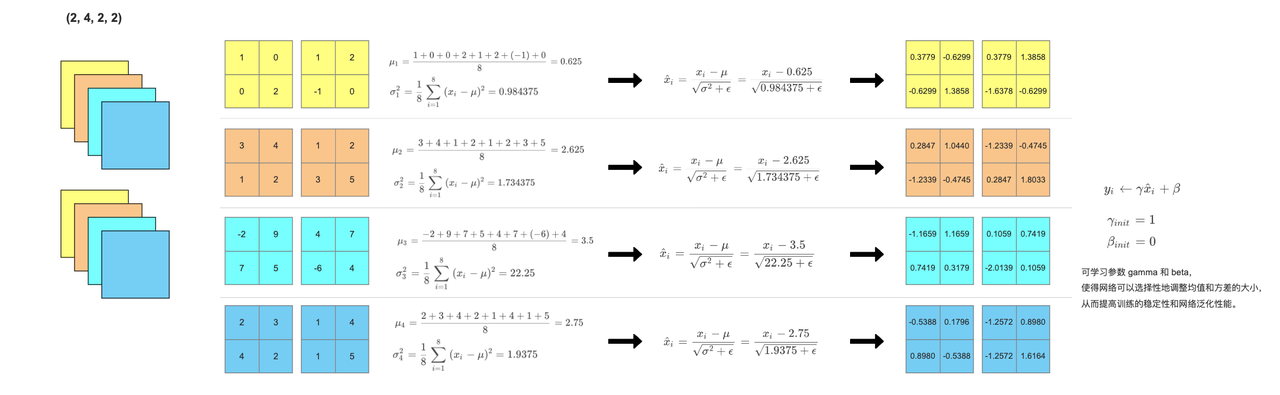

# 3、查看BN 层中的参数数量
BN层中有 weight 和 bias 两个参数（也就是上面计算方式 中的 gamma 和 beta）

如下代码中，BN层输入的 channel数为 16，每个 channel 有 2个可学习参数，一共有32个可学习参数

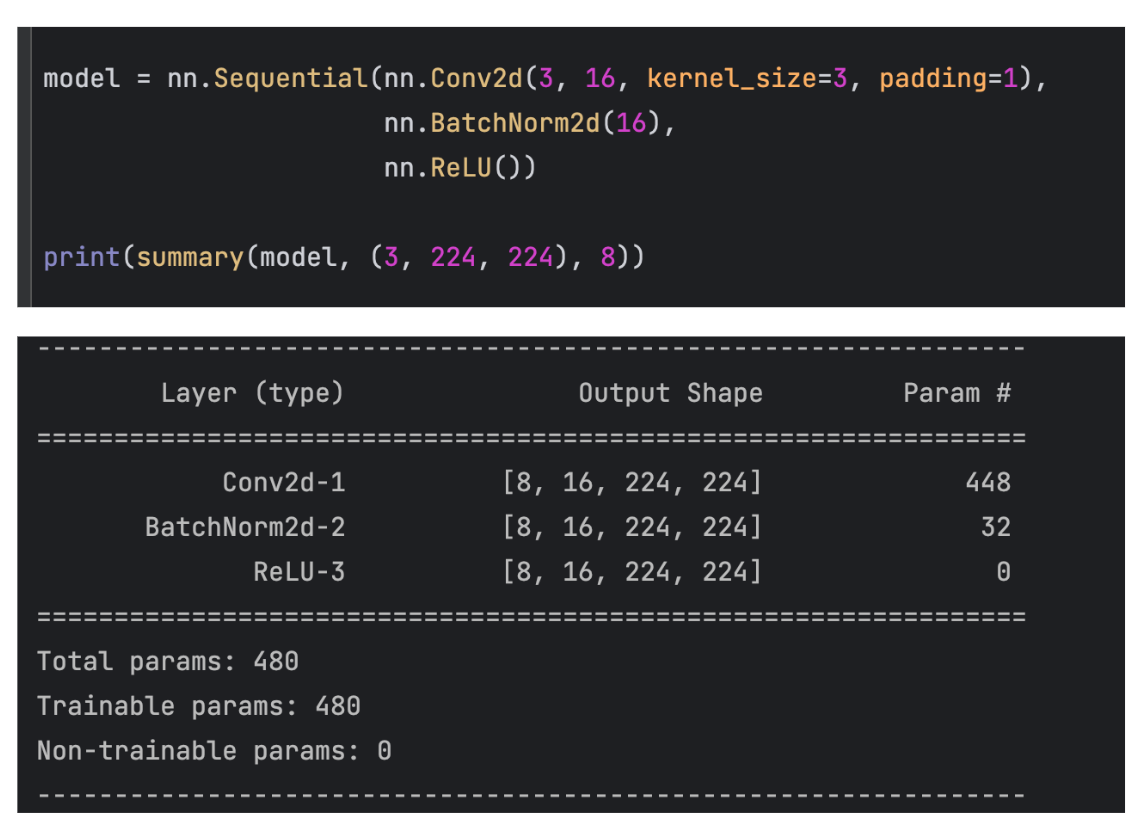


# 4、验证阶段 / 测试阶段的Batch Normalization

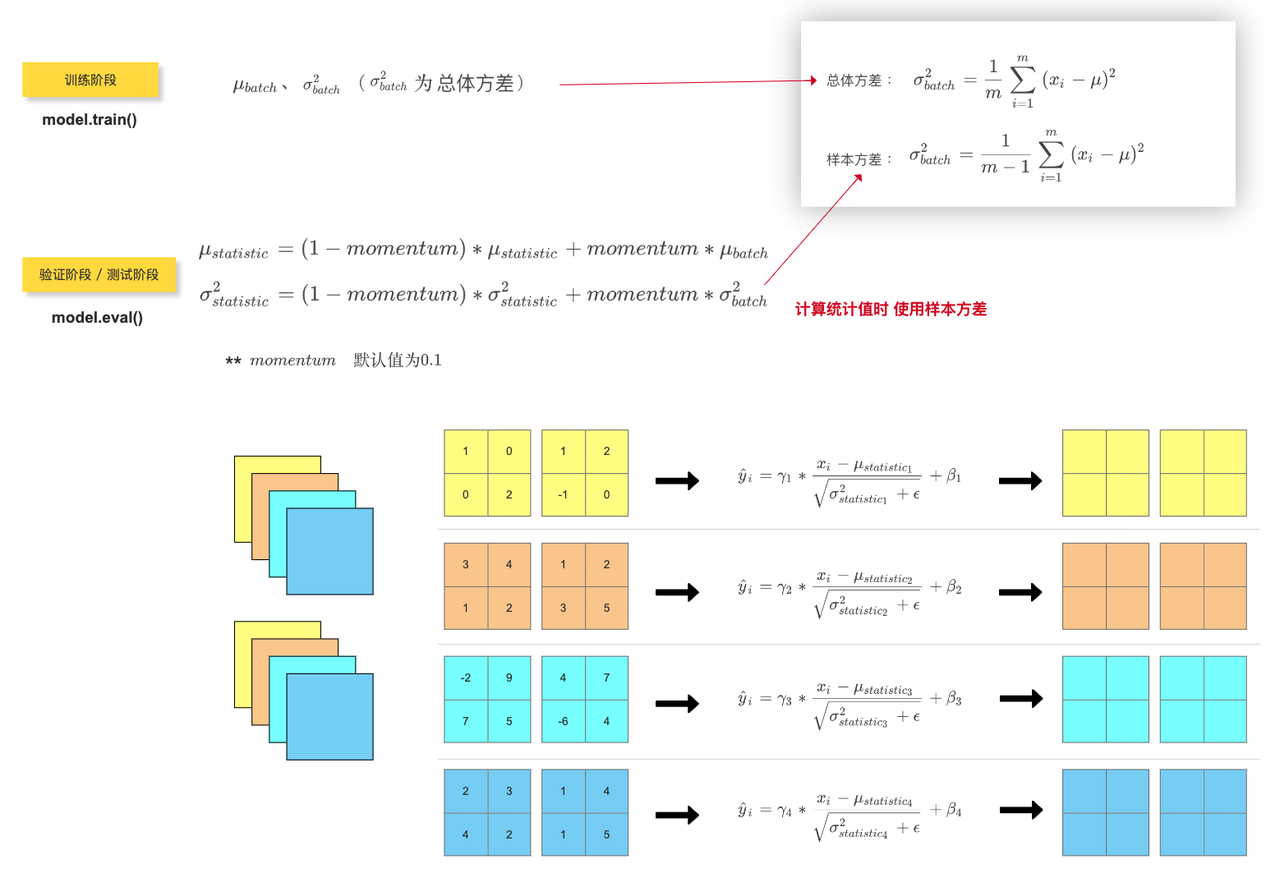

证明一下，自己手动计算出的 BN层的统计均值和统计方差 和调用 nn.BatchNorm() 计算结果一致

In [ ]:
import numpy as np
import torch.nn as nn
import torch


def batch_norm(feature, statistic_mean, statistic_var):
    feature_shape = feature.shape
    for i in range(feature_shape[1]):
        channel = feature[:, i, :, :]
        mean = channel.mean()   # 均值
        std_1 = channel.std()   # 总体标准差
        std_t2 = channel.std(ddof=1)  # 样本标准差
        # 对channel中的数据进行归一化
        feature[:, i, :, :] = (channel - mean) / np.sqrt(std_1 ** 2 + 1e-5)
        # 更新统计均值 和 方差
        statistic_mean[i] = statistic_mean[i] * 0.9 + mean * 0.1
        statistic_var[i] = statistic_var[i] * 0.9 + (std_t2 ** 2) * 0.1

    print(feature)
    print('statistic_mean : ', statistic_mean)
    print('statistic_var : ', statistic_var)



feature_array = np.random.randn(2, 2, 2, 2)
feature_tensor = torch.tensor(feature_array.copy(), dtype=torch.float32)

# 初始化统计均值和方差
statistic_mean = [0.0, 0.0]
statistic_var = [1.0, 1.0]

# 手动计算 batch normalization 结果，打印统计均值和方差
batch_norm(feature_array, statistic_mean, statistic_var)

# 调用 torch.nn.BatchNorm2d
bn = nn.BatchNorm2d(2, eps=1e-5)
output = bn(feature_tensor)

print(output)
print('bn.running_mean : ', bn.running_mean)
print('bn.running_var : ', bn.running_var)

# 5、模型中BN层的使用节点
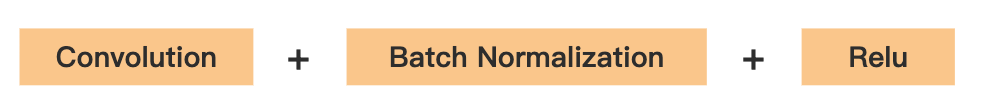

这种顺序之所以能够效果良好，是因为批量归一化能够使得输入分布均匀，而 ReLU 又能够将分布中的负值清除，从而达到更好的效果。

# 6、BN层对卷积层的影响
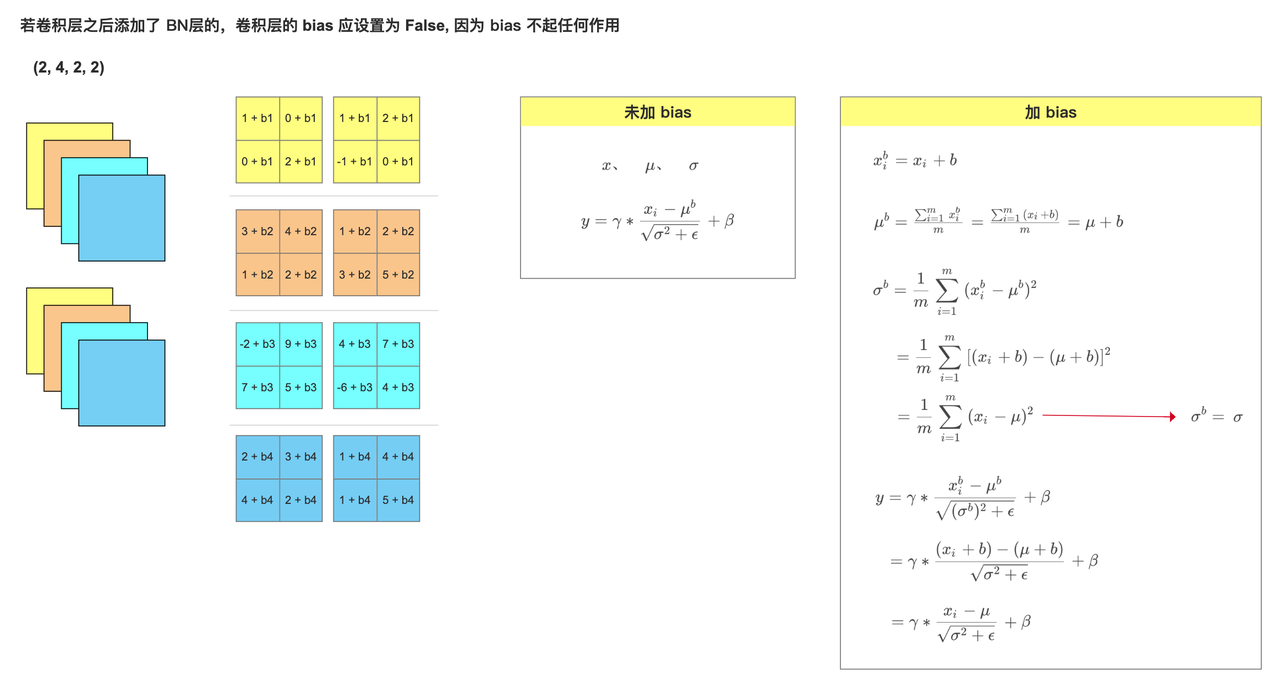